# Hands On with Simple Linear Regression
## Goal for practice
### 1. Performan simple linear regression with SKlearn
### 2. Use model performance KPIs to evaluate model performance
### 3. Perform residule diagnostic and decide proper treatment before fit the model
### 4. Implement SLR with gradient descent algorithm

We have learnt Simple(SLR) Linear Regression, let's use some data to do some hands on work. The data provided is a synthesized data let's fit model with sklearn

#### Load important library

In [1]:
import pandas as pd  
import numpy as np  
import os
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

In [1]:
path="your/data/path"
data1b = "train.csv"
data1t = "test.csv"
data2b = "train2.csv"
data2t = "test2.csv"
data3b = "train3.csv"
data3t = "test3.csv"
#print(os.path.join(path, data1b))

# Read Data

In [3]:
dt1b = pd.read_csv(os.path.join(path, data1b))
dt1t = pd.read_csv(os.path.join(path, data1t))
dt2b = pd.read_csv(os.path.join(path, data2b))
dt2t = pd.read_csv(os.path.join(path, data2t))
dt3b = pd.read_csv(os.path.join(path, data3b))
dt3t = pd.read_csv(os.path.join(path, data3t))

# Practice 1 - Use "train.csv" and "test.csv" build simple linear model 

### Check data quality and scatter plot
#### 1 - head
#### 2 - check null
#### 3 - scatter plot
#### 4 - Train model with model evaluation
#### 5 - check residual plot and diagnostics

In [20]:
print("Train data size: {}".format(dt1b.shape))
print("Test data size: {}".format(dt1t.shape))

Train data size: (700, 2)
Test data size: (300, 2)


In [21]:
dt1b.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [22]:
dt1t.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [28]:
dt1b.describe()

,x,y
count,699.000000,699.000000
mean,50.014306,49.939869
std,28.954560,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,100.000000,108.871618


In [29]:
dt1t.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


In [23]:
print("Train data misscnt: {}".format(dt1b.isnull().sum()))
print("Test data misscnt: {}".format(dt1t.isnull().sum()))

Train data misscnt: x    0
y    1
dtype: int64
Test data misscnt: x    0
y    0
dtype: int64


Noticed train data has a missing value in target , we have to remove the missing value before fit model, 
otherwise you will get error message. Dropna and double check the missing row was removed

In [24]:
dt1b = dt1b.dropna().copy()
print("Train data size: {}".format(dt1b.shape))
print("Test data size: {}".format(dt1t.shape))

Train data size: (699, 2)
Test data size: (300, 2)


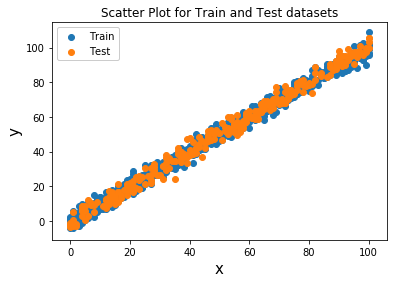

In [26]:
plt.scatter((dt1b['x']),dt1b['y'], label="Train")
plt.title("Scatter Plot for Train and Test datasets")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter((dt1t['x']),dt1t['y'], label="Test")

plt.legend(framealpha=1, frameon=True)

We retrieve the independent(x) and dependent(y) variables and since we have only one feature(x) 
we reshape them so that we could feed them into our linear regression model.

In [31]:
x_train = dt1b['x']
y_train = dt1b['y']
x_test = dt1t['x']
y_test = dt1t['y']

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

Fit model and get the intercept and coefficent

In [40]:
reg = LinearRegression(normalize=True)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9888014444327563
9.43292219203931


In [41]:
print("intercept: {}".format(reg.intercept_))

intercept: -0.10726546430095851


In [43]:
print("coeffcient: {}".format(reg.coef_))

coeffcient: [1.00065638]


Therefore the fitted line : y = -0.10726546430095851 + 1.00065638*x

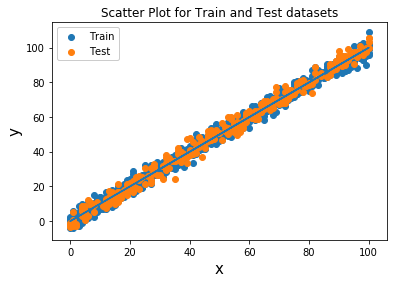

In [52]:
plt.scatter(dt1b['x'],dt1b['y'], label="Train")
plt.title("Scatter Plot for Train and Test datasets")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter((dt1t['x']),dt1t['y'], label="Test")

plt.legend(framealpha=1, frameon=True)

plt.plot(dt1b['x'], (-0.10726546430095851 + 1.00065638*dt1b['x']))

How about build sample residual?

In [46]:
y_pred_b = reg.predict(x_train)
residuale = y_train - y_pred_b

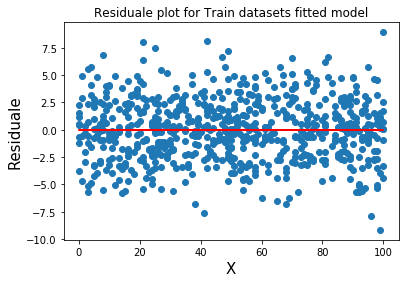

In [50]:
plt.scatter((dt1b['x']),residuale)
plt.title("Residuale plot for Train datasets fitted model")
plt.xlabel("X", fontsize=15)
plt.ylabel("Residuale", fontsize=15)
plt.plot(dt1b['x'], 0*dt1b['x'], color="r")

Residule distributed around zero randomly, the model fit is adequate 

# Practice 2 - Use "train2.csv" and "test2.csv" build simple linear model, did you observe any special trends? How to improve the model fit

Below code give a initial scripts to look into data, 
please take sometime following majority steps of practice 1 to tackle this problem 

In [53]:
print("Train data size: {}".format(dt2b.shape))
print("Test data size: {}".format(dt2t.shape))

Train data size: (700, 2)
Test data size: (300, 2)


In [54]:
dt2b.head()

,x,y
0,576.0,21.549452
1,2500.0,47.464463
2,225.0,17.218656
3,1444.0,36.586398
4,7569.0,87.288984


In [55]:
dt2t.head()

,x,y
0,5929,79.775152
1,441,23.177279
2,484,25.609262
3,400,17.857388
4,1296,41.849864


In [56]:
dt2b.describe()

,x,y
count,7.000000e+02,699.000000
mean,2.113670e+04,49.939869
std,4.709034e+05,29.109217
min,0.000000e+00,-3.839981
25%,6.250000e+02,24.929968
50%,2.401000e+03,48.973020
75%,5.625000e+03,74.929911
max,1.246201e+07,108.871618


In [57]:
dt2t.describe()

,x,y
count,300.000000,300.000000
mean,3404.330000,51.205051
std,2996.644856,29.071481
min,0.000000,-3.467884
25%,729.000000,25.676502
50%,2809.000000,52.170557
75%,5329.000000,74.303007
max,10000.000000,105.591837


In [58]:
print("Train data misscnt: {}".format(dt2b.isnull().sum()))
print("Test data misscnt: {}".format(dt2t.isnull().sum()))

Train data misscnt: x    0
y    1
dtype: int64
Test data misscnt: x    0
y    0
dtype: int64


# Practice 3 - Use "train3.csv" and "test3.csv" build simple linear model, did you observe any special trends? How to improve the model fit

In [82]:
print("Train data size: {}".format(dt3b.shape))
print("Test data size: {}".format(dt3t.shape))

Train data size: (700, 2)
Test data size: (300, 2)


In [83]:
dt3b.head()

,x,y
0,24.0,464.378880
1,50.0,2252.875253
2,15.0,296.482126
3,38.0,1338.564521
4,87.0,7619.366709


In [84]:
dt3t.head()

,x,y
0,77,6364.074878
1,21,537.186256
2,22,655.834278
3,20,318.886311
4,36,1751.411149


In [85]:
dt3b.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,3340.124826
std,134.681703,3055.712556
min,0.000000,0.014850
25%,25.000000,621.515765
50%,49.000000,2398.356724
75%,75.000000,5614.501316
max,3530.157369,11853.029271


In [86]:
dt3t.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,3464.291087
std,28.504286,3082.356336
min,0.000000,0.075794
25%,27.000000,659.283348
50%,53.000000,2721.780348
75%,73.000000,5520.944197
max,100.000000,11149.636147


# Practice 4 - Can you implement simple linear regression model in practice1 from scratch using gradient descent?
# This is your homework

In [ ]:
print("Train data size: {}".format(dt1b.shape))
print("Test data size: {}".format(dt1t.shape))

In [ ]:
x_train = dt1b['x']
y_train = dt1b['y']
x_test = dt1t['x']
y_test = dt1t['y']

x_train = np.array(x_train).reshape(699,1)
y_train = np.array(y_train).reshape(699,1)
x_test = np.array(x_test).reshape(300,1)
y_test = np.array(y_test).reshape(300,1)

### Train steps:
#### 0 - Initiate parameters
#### 1 - Calculate prediction based on temp parameters and equation 
#### 2 - Calc. cost
#### 3 - Calc. Gradient
#### 4 - Update Parameter
#### 5 - loop 1-4 to reach min cost
#### 6 - earlier stop to end loop if minimal alrrady reached

### Building block functions (Only put two you need to finish the rest)

In [ ]:
def get_pred(x_train, parameters):
    b1 = parameters['b1']
    b0 = parameters['b0']
    predictions = np.multiply(b1, x_train) + b0
    return predictions

def cost_function(predictions, y_train):
    cost = np.mean((y_train - predictions) ** 2) * 0.5
    return cost

def deriv(x_train, y_train, predictions):
    #### PLease put you code here######
    
    return derivatives

def update_parameters(parameters, derivatives, learning_rate):
    #### PLease put you code here######
    return parameters

### Build training function

In [ ]:
def train(x_train, y_train, learning_rate, iters = 5):
    #random parameters
    parameters = dict()
    parameters["b1"] = np.random.uniform(0,1) * -1
    parameters["b0"] = np.random.uniform(0,1) * -1
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iterate
    for i in range(iters):
        
        #Prediction
        #### PLease put you code here######
        
        #cost function
        #### PLease put you code here######
        
        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        #plot function
        plt.plot(x_train, y_train, 'x')
        plt.plot(x_train, predictions, 'o')
        plt.show()
        
        #Calc. gradient/derivatives
        #### PLease put you code here######
        
        #update parameters
        #### PLease put you code here######
        
    return parameters, loss

### Traing model with your function by gradient descent algrithm

### Print your final fitted model/ validate model on test data set